#Modelo2 - Utilidad Bruta(Q.)

Este modelo busca predecir la utilidad  bruta que generara la empresa de acuerdo a su total de ventas.
El modelo recibira el total de ventas en Quetzales y predecira la utilidad bruta sobre esa venta.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('utilidad_bruta.csv')


In [ ]:
# Mostrar primeras filas y estadísticas descriptivas
print("--- Primeras filas ---")
print(df.head())
print("\n--- Estadísticas descriptivas ---")
df.describe()

--- Primeras filas ---
     vendido  utilidad
0   13752.30    946.70
1     285.00     17.00
2     128.00     52.00
3  267145.53   5156.47
4     898.67     88.33

--- Estadísticas descriptivas ---


,vendido,utilidad
count,398.000000,398.000000
mean,57612.665201,3483.443367
std,28858.253057,1704.540753
min,128.000000,2.250000
25%,38273.575000,2281.020000
50%,53140.775000,3332.425000
75%,72694.672500,4526.255000
max,267145.530000,11579.320000


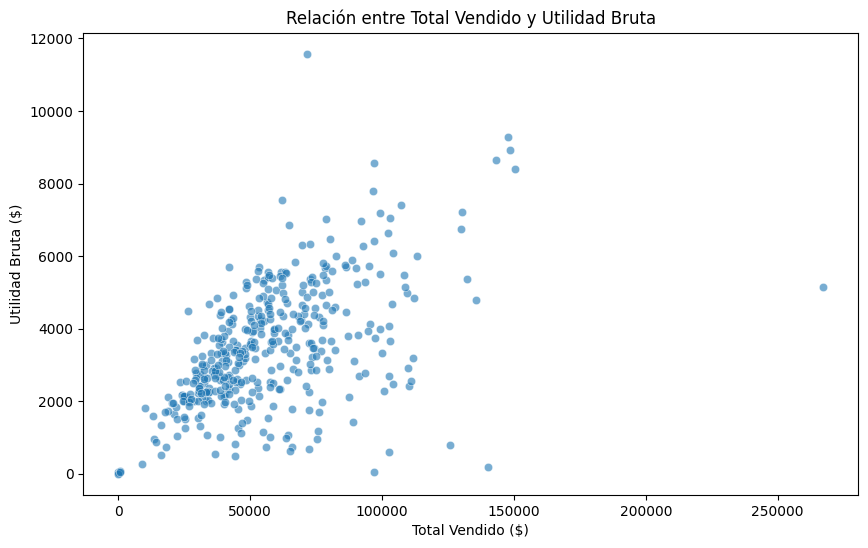

In [ ]:
# Gráfico de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="vendido", y="utilidad", alpha=0.6)
plt.title("Relación entre Total Vendido y Utilidad Bruta")
plt.xlabel("Total Vendido ($)")
plt.ylabel("Utilidad Bruta ($)")
plt.show()

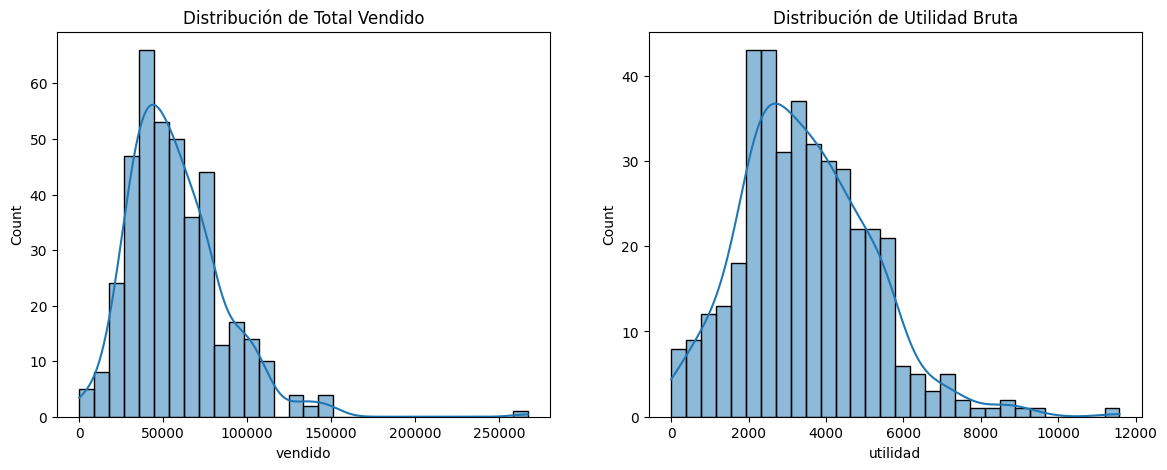

In [ ]:
# Histogramas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["vendido"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Total Vendido")
sns.histplot(df["utilidad"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Utilidad Bruta")
plt.show()



--- Tamaño del DataFrame original y filtrado ---
Original: 398 filas
Filtrado: 385 filas


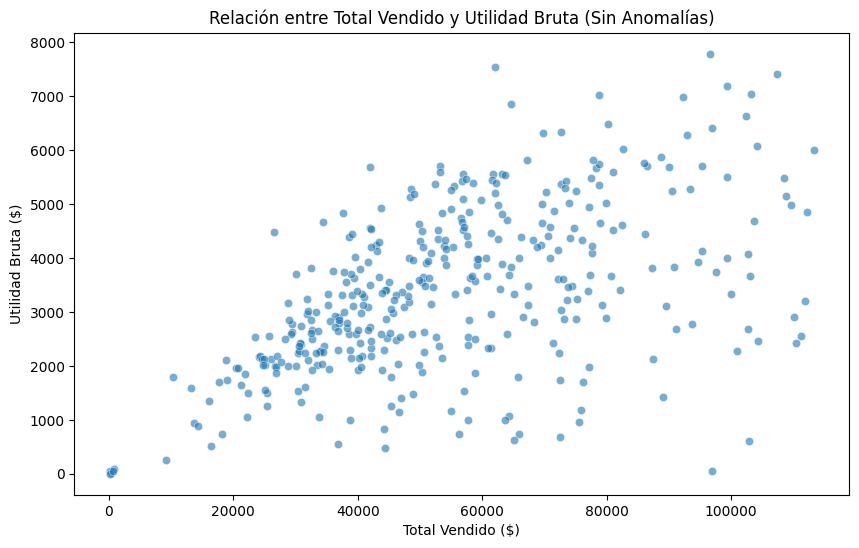

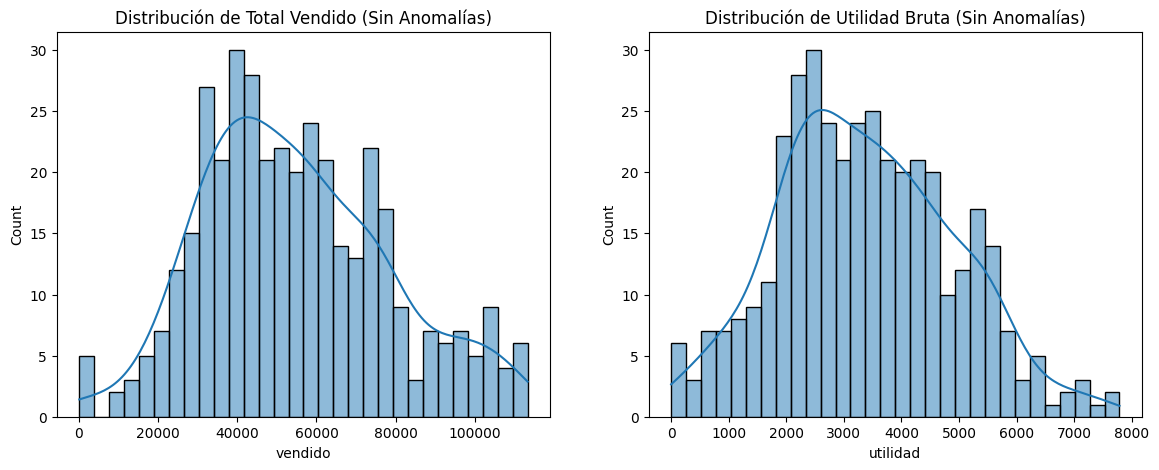

In [ ]:
# prompt: aplicar filtrado de anomalias

# Filtrado de Anomalías (Outliers) usando IQR
Q1 = df[['vendido', 'utilidad']].quantile(0.25)
Q3 = df[['vendido', 'utilidad']].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame, manteniendo solo las filas que no son outliers
df_filtered = df[~((df[['vendido', 'utilidad']] < lower_bound) | (df[['vendido', 'utilidad']] > upper_bound)).any(axis=1)]

print("\n--- Tamaño del DataFrame original y filtrado ---")
print(f"Original: {df.shape[0]} filas")
print(f"Filtrado: {df_filtered.shape[0]} filas")

# Graficar los datos después de filtrar anomalías
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="vendido", y="utilidad", alpha=0.6)
plt.title("Relación entre Total Vendido y Utilidad Bruta (Sin Anomalías)")
plt.xlabel("Total Vendido ($)")
plt.ylabel("Utilidad Bruta ($)")
plt.show()

# Histogramas después de filtrar anomalías
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_filtered["vendido"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Total Vendido (Sin Anomalías)")
sns.histplot(df_filtered["utilidad"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Utilidad Bruta (Sin Anomalías)")
plt.show()

df = df_filtered # Reemplazar el DataFrame original con el filtrado

In [ ]:
# Separar variables
X = df[["vendido"]]
y = df["utilidad"]

# Escalado para SVR (requiere normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en train/test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:

# Lista para almacenar resultados
results = []

# Función para evaluar modelos
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({"Modelo": name, "R²": r2, "RMSE": rmse})
    return model

# --- Modelos ---
# 1. Regresión Lineal
lr = evaluate_model("Regresión Lineal", LinearRegression(), X_train, X_test, y_train, y_test)

# 2. Regresión Polinomial (grado 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = evaluate_model("Regresión Polinomial (grado 2)", LinearRegression(), X_train_poly, X_test_poly, y_train, y_test)

# 3. SVR (Kernel RBF)
svr = evaluate_model("SVR (RBF)", SVR(kernel="rbf", C=100, epsilon=10), X_train, X_test, y_train, y_test)

# 4. Random Forest
rf = evaluate_model("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

# 5. XGBoost
xgb = evaluate_model("XGBoost", XGBRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

# Resultados en DataFrame
results_df = pd.DataFrame(results)
print("\n--- Comparación de Modelos ---")
print(results_df.sort_values("R²", ascending=False))


--- Comparación de Modelos ---
                           Modelo        R²         RMSE
1  Regresión Polinomial (grado 2)  0.408187  1090.865288
0                Regresión Lineal  0.332713  1158.337325
2                       SVR (RBF)  0.328838  1161.695681
3                   Random Forest  0.133205  1320.191279
4                         XGBoost -0.245784  1582.705640


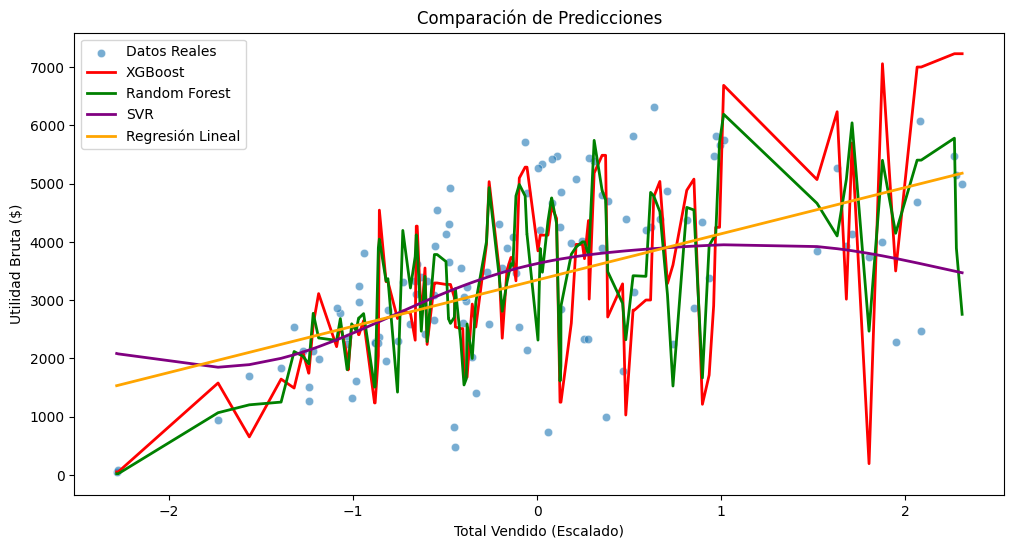

In [ ]:
# Gráfico comparativo de predicciones
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test[:, 0], y=y_test, label="Datos Reales", alpha=0.6)

# Ordenar X_test para graficar líneas continuas
sorted_idx = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_idx]

# Predicciones
models = {"XGBoost": xgb, "Random Forest": rf, "SVR": svr, "Regresión Lineal": lr}
colors = ["red", "green", "purple", "orange"]

for (name, model), color in zip(models.items(), colors):
    if name == "Regresión Lineal":
        y_pred = model.predict(X_test_sorted)
    else:
        y_pred = model.predict(X_test_sorted)
    plt.plot(X_test_sorted[:, 0], y_pred, label=name, linewidth=2, color=color)

plt.title("Comparación de Predicciones")
plt.xlabel("Total Vendido (Escalado)")
plt.ylabel("Utilidad Bruta ($)")
plt.legend()
plt.show()

In [ ]:
# prompt: Genera nuevas predicciones para todos lo modelos si el total vendido fuera 20000

# Nueva predicción para un valor de vendido = 20000
new_vendido = np.array([[25000]])

# Escalar el nuevo valor usando el mismo scaler ajustado en los datos de entrenamiento
new_vendido_scaled = scaler.transform(new_vendido)

# Para Regresión Polinomial, transformar también el nuevo valor escalado
new_vendido_poly = poly.transform(new_vendido_scaled)

print(f"\n--- Predicciones para Total Vendido = {new_vendido[0][0]} ---")

# Realizar predicciones con cada modelo entrenado
pred_lr = lr.predict(new_vendido_scaled)
pred_lr_poly = lr_poly.predict(new_vendido_poly)
pred_svr = svr.predict(new_vendido_scaled)
pred_rf = rf.predict(new_vendido_scaled)
pred_xgb = xgb.predict(new_vendido_scaled)

# Imprimir las predicciones
print(f"Predicción (Regresión Lineal): {pred_lr[0]:,.2f}")
print(f"Predicción (Regresión Polinomial): {pred_lr_poly[0]:,.2f}")
print(f"Predicción (SVR): {pred_svr[0]:,.2f}")
print(f"Predicción (Random Forest): {pred_rf[0]:,.2f}")
print(f"Predicción (XGBoost): {pred_xgb[0]:,.2f}")


--- Predicciones para Total Vendido = 25000 ---
Predicción (Regresión Lineal): 2,346.77
Predicción (Regresión Polinomial): 2,084.40
Predicción (SVR): 2,123.97
Predicción (Random Forest): 1,981.02
Predicción (XGBoost): 2,072.16


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
